# AlexNet Pretrained Model

## 

Built using the function that Tyler created
The tb_preprocess.py script should be in the same folder as the notebook.

In [7]:
from platform import python_version
import sys 

#Get Python Version 
print(python_version())

#Install our packages 
#!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install pandas



!pip list

3.6.9
     |████████████████████████████████| 9.5 MB 15.3 MB/s eta 0:00:01
     |████████████████████████████████| 510 kB 94.0 MB/s eta 0:00:01
Package             Version
------------------- -------
argon2-cffi         20.1.0
async-generator     1.10
attrs               20.3.0
backcall            0.2.0
bleach              3.3.0
cffi                1.14.5
decorator           5.0.7
defusedxml          0.7.1
entrypoints         0.3
importlib-metadata  4.0.1
ipykernel           5.5.3
ipython             7.16.1
ipython-genutils    0.2.0
ipywidgets          7.6.3
jedi                0.18.0
Jinja2              2.11.3
jsonschema          3.2.0
jupyter             1.0.0
jupyter-client      6.1.12
jupyter-console     6.4.0
jupyter-core        4.7.1
jupyterlab-pygments 0.1.2
jupyterlab-widgets  1.0.0
MarkupSafe          1.1.1
mistune             0.8.4
nbclient            0.5.3
nbconvert           6.0.7
nbformat            5.1.3
nest-asyncio        1.5.1
notebook            6.3.0
numpy           

In [2]:
import os
import random
import numpy as np
import pandas as pd
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torchvision import models


#Use the preprocess function from tb_preprocess.py to load the datasets
from tb_preprocess import load_data

train_loader, _, val_loader,_ = load_data()  

print(train_loader)


dataiter = iter(train_loader)
images, labels = dataiter.next()
print(images.shape)
print(labels.shape)
print(labels)

for i, data in (train_loader):
    print(i.shape)
    print(data.shape)
    print(data)







ModuleNotFoundError: No module named 'numpy'

Use the AlexNet model that will is pretrained.


In [192]:
alexnet = models.alexnet(pretrained=True)

#Instantiating CUDA device
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

#Verifying CUDA
print(device)

#Move the input and AlexNet_model to GPU for speed if available
alexnet.to(device)



cpu


AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

The standard Alexnet model has 1000 out features for the last Linear layer.
Since the data set only has 3 classes, change the last layer to have 3 outs

In [193]:
alexnet.classifier[6] = torch.nn.Linear(alexnet.classifier[6].in_features, 3, bias=True)

alexnet.eval()

AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
 

#### Criterion and Optimizer

In [194]:
import torch.optim as optim

#Loss
criterion = nn.CrossEntropyLoss()

#Optimizer(SGD)
optimizer = optim.SGD(alexnet.parameters(), lr=0.001, momentum=0.9)

### Training Alexnet

In [195]:
#Epochs is set to 1. Performace is slow
#Need to try CUDA to speed up

n_epochs = 1

def train_model(model, train_dataloader, n_epoch=n_epochs, optimizer=optimizer, criterion=criterion):
    import torch.optim as optim

    # prep model for training
    model.train() 
    
    for epoch in range(n_epoch):
        curr_epoch_loss = []
        for data, target in train_dataloader:
            
            optimizer.zero_grad()
            
            output = model(data)
            #print(output)
            loss = criterion(output, target)
            
            loss.backward()
            optimizer.step()
            
            curr_epoch_loss.append(loss.cpu().data.numpy())
            
        print(f"Epoch {epoch}: curr_epoch_loss={np.mean(curr_epoch_loss)}")
    
    return model

alexnet = train_model(alexnet, dataiter)

Epoch 0: curr_epoch_loss=1.1232184171676636


#### Testing

Prediction
[2. 1. 1. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2.
 2. 2. 1. 2. 1. 1. 1. 1.]
Prediction
[2. 1. 1. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2.
 2. 2. 1. 2. 1. 1. 1. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2.
 1. 2. 2. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 1. 1. 1.]
Prediction
[2. 1. 1. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2.
 2. 2. 1. 2. 1. 1. 1. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2.
 1. 2. 2. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 2. 2. 1. 2. 2.
 1. 2. 1. 1. 1. 2. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 1. 1.]
Prediction
[2. 1. 1. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 2.
 2. 2. 1. 2. 1. 1. 1. 1. 2. 2. 2. 2. 2. 1. 2. 2. 2. 2. 1. 2. 2. 2. 1. 2.
 1. 2. 2. 1. 1. 2. 1. 1. 1. 2. 2. 2. 1. 1. 1. 1. 2. 1. 2. 2. 2. 1. 2. 2.
 1. 2. 1. 1. 1. 2. 2. 1. 1. 1. 2. 2. 2. 2. 2. 2. 1. 2. 1. 1. 2. 1. 1. 1.
 1. 2. 2. 2. 2. 1. 2. 2. 2. 2. 2. 1. 1. 1. 2. 1. 1. 2. 2. 1. 2.]
Validation 

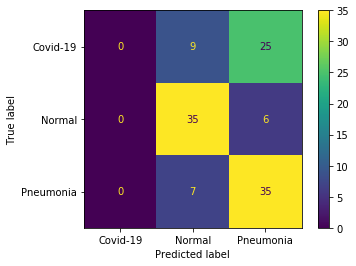

In [196]:
def eval_model(model, dataloader):

    model.eval()
    Y_pred = []
    Y_test = []
    for data, target in dataloader:
        # your code here
        output = model(data)
        #print(output.data)
        #print(target)
        _, y_predicted = torch.max(output.data, 1)
        
      
        Y_pred = np.append(Y_pred,y_predicted.detach().numpy())
        Y_test = np.append(Y_test,target.detach().numpy())
        print('Prediction')
        print(Y_pred)
        #print('Test')
        #print(Y_test)
        
    #print(Y_pred)
    #Y_pred = np.concatenate(Y_pred, axis=0)
    #Y_test = np.concatenate(Y_test, axis=0)
    
    return Y_pred, Y_test

from sklearn.metrics import accuracy_score,classification_report, confusion_matrix, ConfusionMatrixDisplay

y_pred, y_true = eval_model(alexnet, train_loader)
acc = accuracy_score(y_true, y_pred)

print(("Validation Accuracy: " + str(acc)))

# Classification Report
print(classification_report(y_true, y_pred))

# Confusion Matrix
print(confusion_matrix(y_true, y_pred))

idx2class = {'covid-19': 0, 'normal': 1, 'pnuemonia': 2}
classes = ('Covid-19', 'Normal', 'Pneumonia')

#
confusion_matrix_df = pd.DataFrame(confusion_matrix(y_true, y_pred)).rename(columns=idx2class, index=idx2class)

cm = confusion_matrix(y_true, y_pred)
print(cm)

cm_display = ConfusionMatrixDisplay(cm,classes).plot()






## Testing Accuracy

Classification accuracy of the test model.

In [197]:

correct = 0
total = 0

# no_grad impacts the autograd engine and deactivate it. It will reduce memory usage and speed up computations
with torch.no_grad():
    for data in train_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = alexnet(images)
        #print(outputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on test X-rays : %d %%' % ( 100 * correct / total))



Accuracy of the network on test X-rays : 61 %


## Individual Classes


In [198]:
#Testing classification accuracy for individual classes.
class_correct = list(0. for i in range(3))
class_total = list(0. for i in range(3))

with torch.no_grad():
    for data in train_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = alexnet(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

for i in range(3):
    print('Accuracy of %5s : %2d %%' % (
         classes[i], 100 * class_correct[i] / class_total[i]))


Accuracy of Covid-19 :  0 %
Accuracy of Normal : 100 %
Accuracy of Pneumonia : 83 %
